In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
reuse=tf.AUTO_REUSE
import keras

/home/kaiser17/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [62]:
a=x_train[2].reshape(1,784)
b=x_train[3].reshape(1,784)

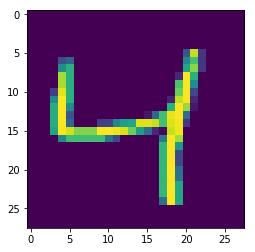

In [63]:
plt.imshow(x_train[2])

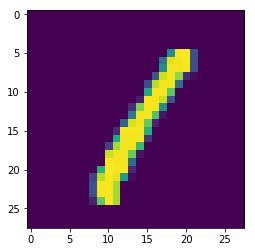

In [64]:
plt.imshow(x_train[3])

In [16]:
def placeH(n_X):
    a1=tf.placeholder(dtype=tf.float32,shape=[1,n_X])
    a2=tf.placeholder(dtype=tf.float32,shape=[1,n_X])
    return a1,a2

In [20]:
def Initialisation():
    tf.set_random_seed(1)                   
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
        W1 = tf.get_variable("W1", [1,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    return W1

In [21]:
def loss(Z3,Org):
    e=tf.square(tf.subtract(Z3,Org))
    q=tf.reduce_mean(e)
    return(q)
    

In [22]:
def model(a,b,Alpha,Beta,epoch):
    Z3=Initialisation()
    X,Y=placeH(784)
    cost1=loss(Z3,X)
    cost2=loss(Z3,Y)
    net_cost=Alpha*cost1+Beta*cost2
    train = tf.train.AdamOptimizer(1e-4).minimize(net_cost)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())      
        for i in range(epoch):
            _,costl=ss.run([train,net_cost],feed_dict={X:a,Y:b})
        ans=ss.run(Z3)
    return ans
            
    

In [69]:
q1=model(a,b,1,1000,10000)


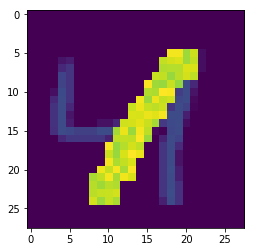

In [70]:
e=q1.reshape(28,28)
plt.imshow(e)